# Research

In [34]:
import json
import pandas as pd

DATABASE_DUMP_FILE = './db.json'

In [35]:
with open(DATABASE_DUMP_FILE, 'r') as f:
    db = json.load(f)

def get_df(sql_model='core.annotation'):
    df = pd.DataFrame(db)
    df = df[df.model == sql_model]
    
    if 'date' in df.columns.values:
        df = df.set_index('date')

    return pd.json_normalize(df.fields).assign(pk=df.pk.values)

In [36]:
annotation_df = get_df()
profile_df = get_df('core.profile')

## Annotation Statistics

<AxesSubplot:title={'center':'Achieved Points Distribution'}, ylabel='Frequency'>

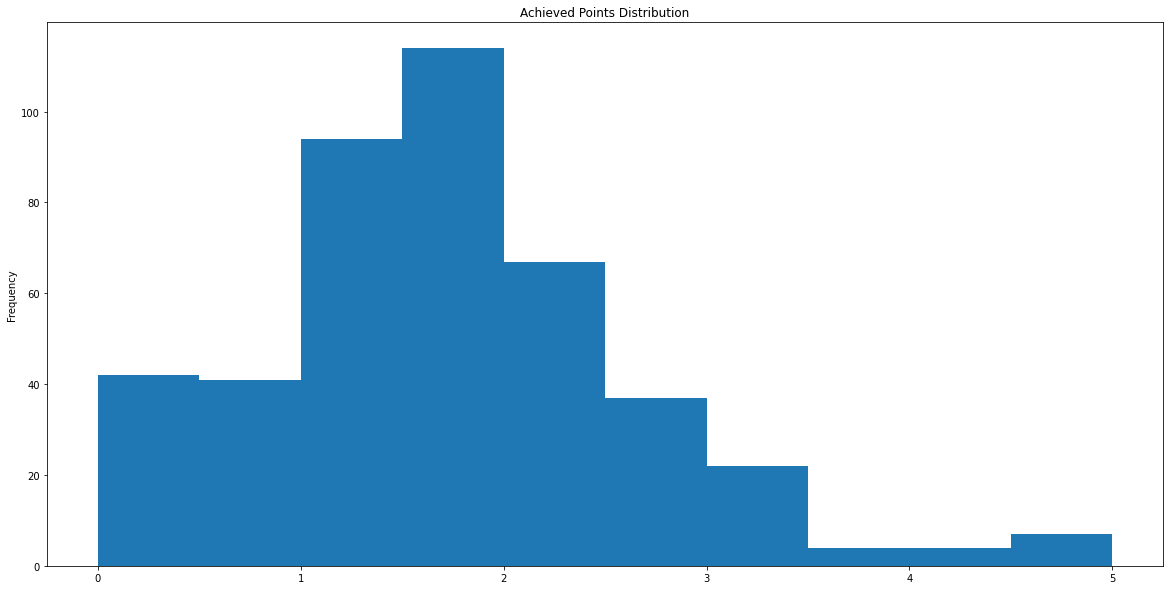

In [37]:
annotation_df.groupby('annotator').points.mean().plot.hist(
    figsize=(20, 10),
    title='Achieved Points Distribution'
)

## Profile Statistics

In [42]:
profile_df.is_temporary.mean()

0.8858729179518815